# EXPLORATION 05

# 5.나랑 닮은 연예인은 누구?

* Writier : 송영석
* Date : 2021.10.14

## 1.이미지 가져오기

file_list: ['이근대위.jpeg', '아이즈원김채원.jpg', '이성경.jpg', '기성용.jpg', '김민재.jpeg', '딕헌터.jpeg', '목진화.png', '김연우.jpeg', '제니.jpg', '야마다 타카유키.jpeg', '아이린.jpeg', '이진호.jpeg', '디오.jpeg', '트와이스모모.jpeg', '박정민.jpg', '한소희.jpeg', '도지한.jpg', '슈가.jpg', '조승우.jpeg', '줄리엔강.png', '슬기.jpg', '지민(BTS).jpg', '잇지유나.jpg', '이성민.jpg', '문재인.jpeg', '김C.jpeg', '하현우.jpg', '수호.jpg', '슈퍼비.jpeg', '류준열_1.jpg', '양세형.jpeg', '조정석.jpg', '하승진.jpg', '노홍철.jpeg', '최준석.jpg', 'image_3.jpg', '박보검.jpg', '레오나르도 디카프리오.jpeg', '미미.jpg', '러블리즈예인.jpg', '유해진.jpg', '방시혁.jpeg', '유희열.jpeg', '이민호.jpeg', '잇섭.png', '이제훈.jpeg', '존 파브르.jpeg', '지수.jpg', 'b1a4진영.jpeg', '지디.jpg', '레인보우재경.jpg', '유세윤.jpg', '티모시 달튼.jpeg', '성룡.jpg', '아이유.jpg', '김다미.jpg', '비니.jpg', '케이.jpg', '배성우.png', '수지.jpg', '길.jpg', '김영삼.jpeg', '이범수.jpeg', '잭 블랙.jpeg', '잇지예지.jpeg', '손예진.jpeg', '철면수심.jpg', '박항서.jpg', '유재석.jpg', '정국.jpg', '앤드류 응.png', '이광수.jpg', '박찬욱.jpeg', '김희철.jpg', '브래들리 쿠퍼.jpg', '서장훈.jpg', '황병국.jpg', '뷔.png', '믹키유천.jpg', '유아인.jpg', '크리스 햄스워스.jpg', '심수창.jpeg', '옥냥이.jpeg', 

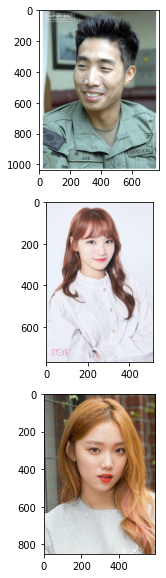

In [21]:
#샘플이미지들 확인
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images_1/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

[(204, 760, 590, 375)]


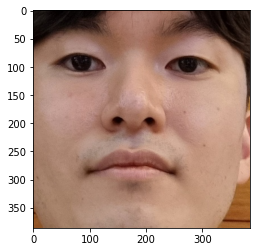

In [22]:
#얼굴만 정확히 가져오기
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images_1/celebrity/image_1.png'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [23]:
# 이미지 파일 경로를 파라미터로 넘기면 얼굴영역만 잘라서 주는 함수
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]   
    
    return cropped_face

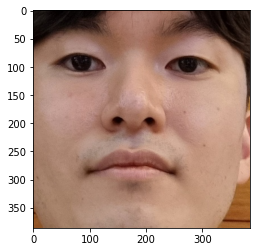

In [24]:
#위에서 만든 함수 확인
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images_1/celebrity/image_1.png'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## 2. 임베딩 만들기

In [33]:
#이미지 파일들 이름 가져오기
import os

file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))
file_list.remove('.ipynb_checkpoints')

file_list: ['이근대위.jpeg', '아이즈원김채원.jpg', '이성경.jpg', '기성용.jpg', '김민재.jpeg', '딕헌터.jpeg', '목진화.png', '김연우.jpeg', '제니.jpg', '야마다 타카유키.jpeg', '아이린.jpeg', '이진호.jpeg', '디오.jpeg', '트와이스모모.jpeg', '박정민.jpg', '한소희.jpeg', '도지한.jpg', '슈가.jpg', '조승우.jpeg', '줄리엔강.png', '슬기.jpg', '지민(BTS).jpg', '잇지유나.jpg', '이성민.jpg', '문재인.jpeg', '김C.jpeg', '하현우.jpg', '수호.jpg', '슈퍼비.jpeg', '류준열_1.jpg', '양세형.jpeg', '조정석.jpg', '하승진.jpg', '노홍철.jpeg', '최준석.jpg', 'image_3.jpg', '박보검.jpg', '레오나르도 디카프리오.jpeg', '미미.jpg', '러블리즈예인.jpg', '유해진.jpg', '방시혁.jpeg', '유희열.jpeg', '이민호.jpeg', '잇섭.png', '이제훈.jpeg', '존 파브르.jpeg', '지수.jpg', 'b1a4진영.jpeg', '지디.jpg', '레인보우재경.jpg', '유세윤.jpg', '티모시 달튼.jpeg', '성룡.jpg', '아이유.jpg', '김다미.jpg', '비니.jpg', '케이.jpg', '배성우.png', '수지.jpg', '길.jpg', '김영삼.jpeg', '이범수.jpeg', '잭 블랙.jpeg', '잇지예지.jpeg', '손예진.jpeg', '철면수심.jpg', '박항서.jpg', '유재석.jpg', '정국.jpg', '앤드류 응.png', '이광수.jpg', '박찬욱.jpeg', '김희철.jpg', '브래들리 쿠퍼.jpg', '서장훈.jpg', '황병국.jpg', '뷔.png', '믹키유천.jpg', '유아인.jpg', '크리스 햄스워스.jpg', '심수창.jpeg', '옥냥이.jpeg', 

In [34]:
image_file = os.path.join(dir_path, 'image_2.png')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.15004991,  0.1629499 ,  0.00102266, -0.07548261, -0.14337882,
        -0.06423401, -0.05096061, -0.09191819,  0.111324  , -0.03738829,
         0.21799289, -0.06309215, -0.26378593, -0.08665673, -0.0441328 ,
         0.1648635 , -0.14218403, -0.14251646, -0.06550673,  0.00509446,
         0.1419985 ,  0.01003199,  0.00336767,  0.04824701, -0.04403327,
        -0.31650016, -0.03412382,  0.00332167,  0.00893639, -0.05250635,
        -0.01391642,  0.06290192, -0.21958321, -0.08597028,  0.05358412,
         0.16548903, -0.02691029, -0.04910268,  0.14830199, -0.05998522,
        -0.21461593, -0.02479879,  0.08323561,  0.22410494,  0.1745249 ,
         0.03120982,  0.00733571, -0.14521614,  0.07043709, -0.1732735 ,
         0.00042609,  0.19075623,  0.06229974,  0.04241279,  0.06108196,
        -0.14530374,  0.07984034,  0.10624143, -0.11583357, -0.06131562,
         0.12297204, -0.0491005 , -0.04221865, -0.16543157,  0.21725608,
         0.02362077, -0.10908688, -0.18624745,  0.0

In [35]:
#me 디렉토리 안에 모든 이미지 파일을 임베딩 구해서 dict에 담아 리턴하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    file_list.remove('.ipynb_checkpoints')
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
       
    return embedding_dict



In [36]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['image_1']

array([-0.11509848,  0.10771704, -0.0157806 , -0.08335462, -0.0943635 ,
       -0.01870321, -0.05194057, -0.0744423 ,  0.12661442, -0.09188736,
        0.22770768, -0.08305635, -0.2279315 , -0.10541712, -0.08365062,
        0.17446539, -0.20335938, -0.10270465, -0.03347202,  0.01388713,
        0.17932884,  0.00941938, -0.01261075,  0.04172834, -0.04029875,
       -0.36839879, -0.08610626, -0.00038764,  0.03329604, -0.04400747,
        0.00549586,  0.10538062, -0.20160264, -0.05813776,  0.03215309,
        0.13049483,  0.01003656, -0.05487369,  0.13594016, -0.03372205,
       -0.20991315,  0.0069345 ,  0.07288133,  0.23700967,  0.1335078 ,
        0.03933569,  0.00696726, -0.12672937,  0.0697983 , -0.13467647,
        0.00081359,  0.18748927,  0.09000366,  0.03012586,  0.0392134 ,
       -0.09704995,  0.05148983,  0.1065876 , -0.12693766, -0.04477168,
        0.09957197, -0.06502272, -0.00898273, -0.16114926,  0.1820534 ,
        0.03298141, -0.098542  , -0.22150478,  0.14390892, -0.11

## 3. 얼굴사이의 임베딩 거리 측정


In [37]:
#임베딩 거리를 구하는 함수
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('image_3', 'image_2')

0.4232091075164375

## 4. 모은 연예인들과 비교하기

### 4 - 1내 얼굴 사이의 거리 비교  
제 얼굴들끼리는 비교적 점수가 작은 것으로  (가까운 것으로) 보아 성능이 좋게 작동하는 것을 알 수 있었습니다.

In [38]:
# image_1와 image_2
get_distance('image_1', 'image_2')

0.3208588886400436

In [39]:
# image_2와 image_3
get_distance('image_2', 'image_3')

0.4232091075164375

In [40]:
# image_1와 image_3
get_distance('image_1', 'image_3')

0.3494936197734971

In [41]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('image_1')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [42]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('image_1',
  array([-0.11509848,  0.10771704, -0.0157806 , -0.08335462, -0.0943635 ,
         -0.01870321, -0.05194057, -0.0744423 ,  0.12661442, -0.09188736,
          0.22770768, -0.08305635, -0.2279315 , -0.10541712, -0.08365062,
          0.17446539, -0.20335938, -0.10270465, -0.03347202,  0.01388713,
          0.17932884,  0.00941938, -0.01261075,  0.04172834, -0.04029875,
         -0.36839879, -0.08610626, -0.00038764,  0.03329604, -0.04400747,
          0.00549586,  0.10538062, -0.20160264, -0.05813776,  0.03215309,
          0.13049483,  0.01003656, -0.05487369,  0.13594016, -0.03372205,
         -0.20991315,  0.0069345 ,  0.07288133,  0.23700967,  0.1335078 ,
          0.03933569,  0.00696726, -0.12672937,  0.0697983 , -0.13467647,
          0.00081359,  0.18748927,  0.09000366,  0.03012586,  0.0392134 ,
         -0.09704995,  0.05148983,  0.1065876 , -0.12693766, -0.04477168,
          0.09957197, -0.06502272, -0.00898273, -0.16114926,  0.1820534 ,
          0.03298141, -0.

### 4-2 연예인 닮은꼴 찾기

In [56]:
def get_nearest_face(name, top=10):
    image_list =[]
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(0,top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
        image_list.append(sorted_faces[i][0])
    return image_list 


In [80]:
#del(embedding_dict['image_2']) # 내 이미지들 제거
#del(embedding_dict['image_3'])


i_list = get_nearest_face('image_1')
i_list.insert(0, 'image_1')
i_list.insert(1, 'image_2')
i_list.insert(2, 'image_3')
print(i_list)


순위 1 : 이름(RM), 거리(0.39622599736888975)
순위 2 : 이름(믹키유천_1), 거리(0.40440885513783054)
순위 3 : 이름(목진화), 거리(0.4051358612293838)
순위 4 : 이름(슈가), 거리(0.41141610712183085)
순위 5 : 이름(정수빈), 거리(0.4195123843423098)
순위 6 : 이름(이대형), 거리(0.42863124881702186)
순위 7 : 이름(스윙스), 거리(0.4296665506456142)
순위 8 : 이름(류현진), 거리(0.4326947501811699)
순위 9 : 이름(박정민), 거리(0.4331283094310551)
순위 10 : 이름(디오), 거리(0.4357177906992965)
['image_1', 'image_2', 'image_3', 'RM', '믹키유천_1', '목진화', '슈가', '정수빈', '이대형', '스윙스', '류현진', '박정민', '디오']


## 5. 다양한 재미있는 시각화 시도해 보기


### * 나와 닮은 연예인 그래프 출력

In [99]:
# 축 라벨 한글 이름 출력을 위한 폰트 다운로드


from matplotlib import font_manager, rc
font_url = "NanumGothic.ttf"

font_name = font_manager.FontProperties(fname=font_url).get_name()
rc('font', family=font_name)

닮은 연예인: ['image_1', 'image_2', 'image_3', 'RM', '믹키유천_1', '목진화', '슈가', '정수빈', '이대형', '스윙스', '류현진', '박정민', '디오']


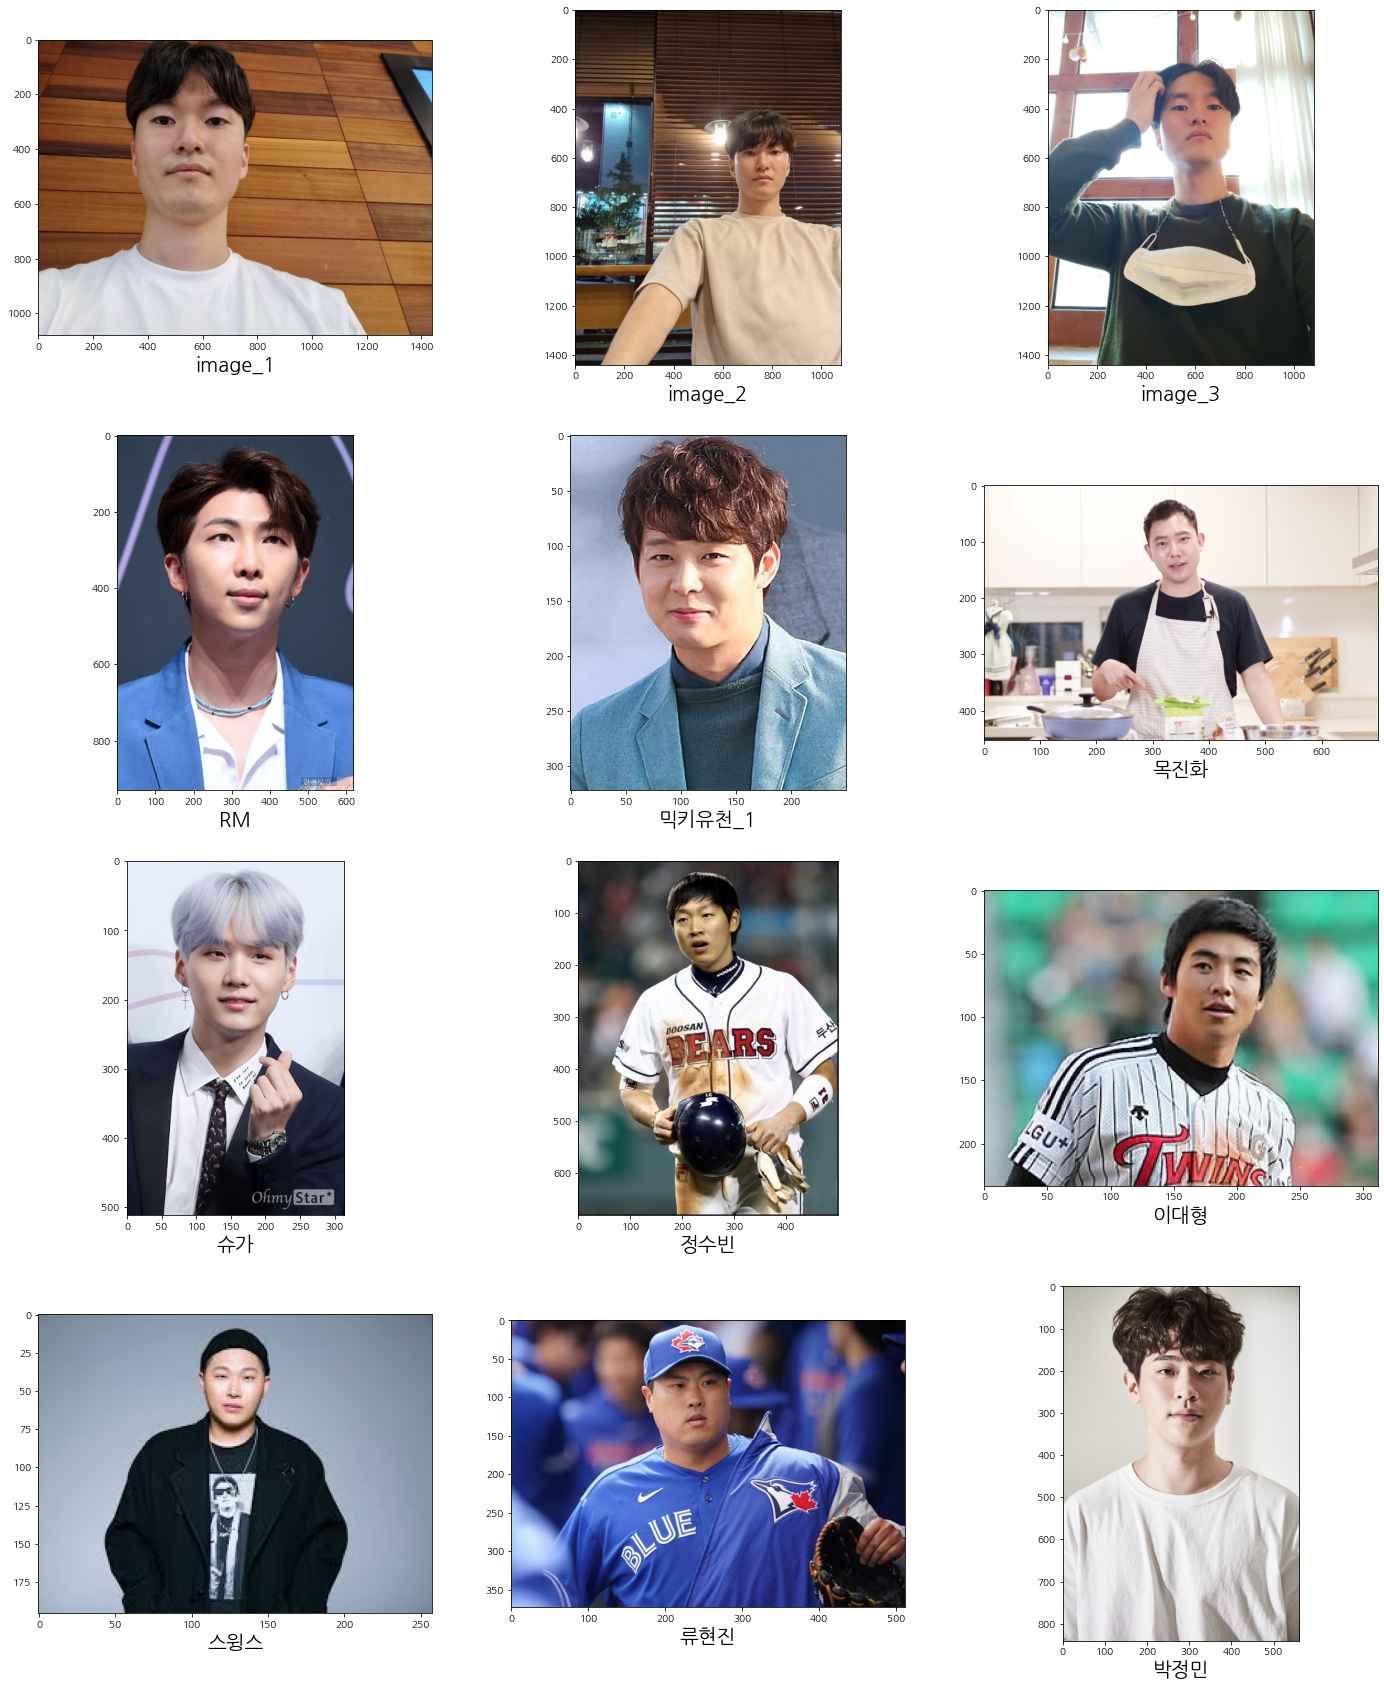

In [100]:
print ("닮은 연예인: {}".format(i_list))

#Set figsize here
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(24,30))



for i, ax in enumerate(axes.flatten()):
    
    image = img.imread(dir_path+'/'+i_list[i]+'.jpg')
    ax.imshow(image)
    ax.set_xlabel(i_list[i],fontsize=20)
plt.show()

fig.tight_layout()

# 회고

 - 내 사진 중에 어떤 것이 저의 특징을 잘 잡고 있고 파악 할 수 있는지 고민하였습니다. 마스크 끼고 있지 않는 최근 1년내의 사진을 요즘 시기에 앨범을 통해 찾는게 쉽지 않았습니다.
 - 얼굴영역을 잘라내는 것에서 예전 EX03에서 했던 detector_hog 보다 더 얼굴 이미지를 잘 잡아 내는 것 같았습니다. (옆모습, 멀리서 찍은 모습)
 - 임베딩 과정중에 ipynb checkpoint가 생기는 문제의 원인을 제대로 파악하지 못해 더 알아봐야 할 것 같았습니다.
 - 닮은 꼴을 찾는 방법의 이론들에서 FaceNet의 Triplet loss의 이론이 닮은 것은 가깝게 만들고 다른 것은 멀게 한다는 부분을 더 깊게 찾아봐야겠습니다.
 - 연예인들과 비교하여 9명 정도를 리스트에 담아 마지막 시각화 까지 하였습니다. 닮은 것 같기도 하고 안 닮은 것 같기도 하여서 신기하였습니다.